# References

## References Provided by Ketan

* AirFlow :- https://airflow-tutorial.readthedocs.io/en/latest/airflow-intro.html 


## Additional References BYME to study when I will have enough time
Airflow
- Airflow Tutorial from the official documentation: https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html
- Airflow Tutorial from Astronomer: https://www.astronomer.io/guides/airflow-tutorial/
- Airflow Tutorial from Tutorialspoint: https://airflow-tutorial.readthedocs.io/en/latest/dags.html

## Refered Videos
* https://youtu.be/IH1-0hwFZRQ

# AirFlow Basics

###DAG (Directed Acyclic graph)

* Node = Tasks
* Edges (arrows) = references

Graph must not be cyclic, else due to the loop of the nodes, it will not be allowed by `Airflow`.

Example of DAG:

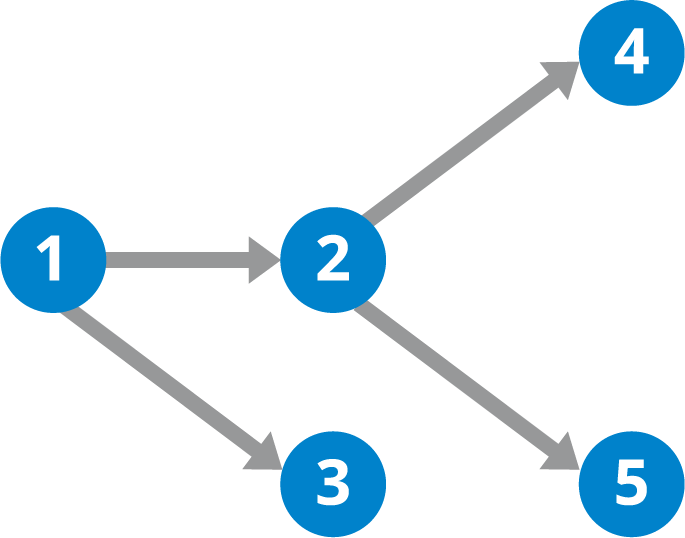

## Idempotent
When we say that something is idempotent it means it will produce the same result regardless of how many times this is run (i.e. the results are reproducible).

## 4 main components to Apache Airflow

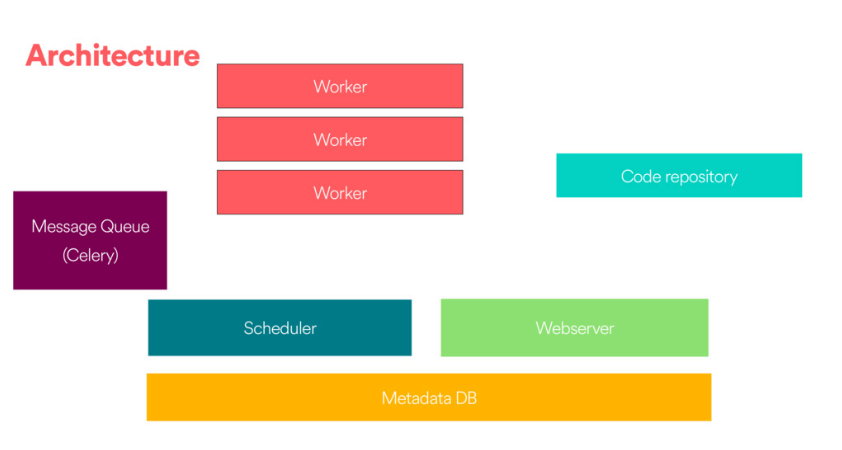



1. `Web server`: Flask app where you can track the status of your jobs and read logs from a remote file store (e.g. Azure Blobstorage).

2. `Scheduler`:
This component is responsible for scheduling jobs. This is a multithreaded Python process that uses the DAGb object to decide what tasks need to be run, when and where.

  The task state is retrieved and updated from the database accordingly. The web server then uses these saved states to display job information.

3. `Executor`:
The mechanism that gets the tasks done.

4. `Metadata database`:
* Powers how the other components interact
* Stores the Airflow states
* All processes read and write from here


## Defining tasks
You can choose among;

* `BashOperator`
* `PythonOperator`
* `EmailOperator`
* `SimpleHttpOperator`
* `MySqlOperator` (and other DB)

# YouTube / Airflow DAG: Coding your first DAG for Beginners
- `Data with Marc`

## Creating a DAG

```

      Training Model A                   Accurate
                     \                     ^
                      \                   /    
Training Model B -----> Choosing Best Model  
                         ^                \
                        /                  \-> Inaccurate
         Training Model C
```

## Expected flow 
1. Train fake models (create just random ML models for input)
2. Calculate accuracies and choose the best Accoracy model
3. If this accuracy is above threshold: Run `Accurate`,
  else: Run `Inaccurate`            

## Steps
1. Install docker from https://docs.docker.com/desktop/install/windows-install/
2. Install docker compose from https://docs.docker.com/compose/install/

In [2]:
!pip install airflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Faced issues during installation
* https://airflow.apache.org/docs/apache-airflow/stable/howto/docker-compose/index.html
* https://airflow-tutorial.readthedocs.io/en/latest/setup.html#windows
* https://youtu.be/aTaytcxy2Ck

So, just writing code and pasting screenshots from video here

## CODE

In [ ]:
from airflow import DAG
from airflow.operators.python import PythonOperator, BranchPythonOperator
from airflow.operators.bash import BashOperator

from random import randint
from datetime import datetime

def _choose_best_model(ti):
    accuracies = ti.xcom_pull(task_ids=[
        'training_model_A',
        'training_model_B',
        'training_model_C'
    ])
    best_accuracy = max(accuracies)
    if (best_accuracy > 8):
        return 'accurate'
    return 'inaccurate'


def _training_model():
    return randint(1, 10)

with DAG("my_dag", start_date=datetime(2021, 1, 1),
    schedule_interval="@daily", catchup=False) as dag:

        training_model_A = PythonOperator(
            task_id="training_model_A",
            python_callable=_training_model
        )

        training_model_B = PythonOperator(
            task_id="training_model_B",
            python_callable=_training_model
        )

        training_model_C = PythonOperator(
            task_id="training_model_C",
            python_callable=_training_model
        )

        choose_best_model = BranchPythonOperator(
            task_id="choose_best_model",
            python_callable=_choose_best_model
        )

        accurate = BashOperator(
            task_id="accurate",
            bash_command="echo 'accurate'"
        )

        inaccurate = BashOperator(
            task_id="inaccurate",
            bash_command="echo 'inaccurate'"
        )

        [training_model_A, training_model_B, training_model_C] >> choose_best_model >> [accurate, inaccurate]

OUTPUT:

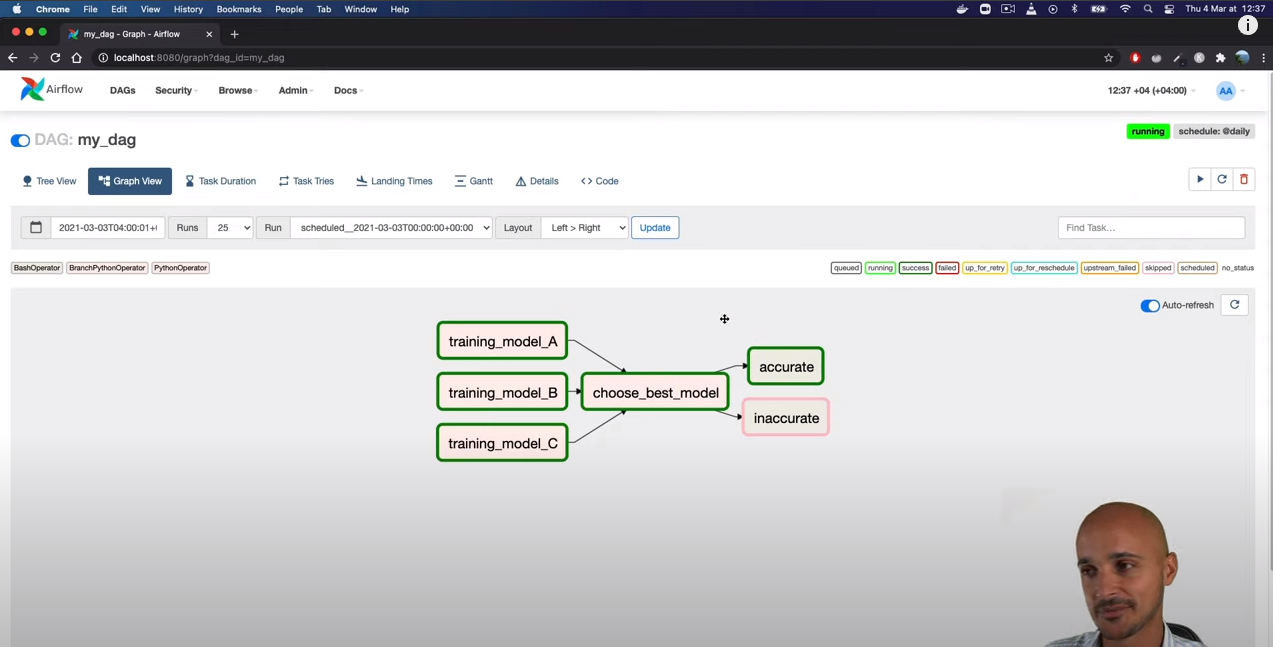


### Better version of above code
(just combined a way to make `training_model_A`, `training_model_B` and `training_model_C` and replced them with `training_model_tasks` to make code shorter and more generic) + used some extra useless variable

In [ ]:
from airflow import DAG
from airflow.operators.python import PythonOperator, BranchPythonOperator
from airflow.operators.bash import BashOperator

from datetime import datetime
from random import randint

def _choosing_best_model(ti):
    accuracies = ti.xcom_pull(task_ids=[
        'training_model_A',
        'training_model_B',
        'training_model_C'
        ])
    if max(accuracies) > 8:
        return 'accurate'
    return 'inaccurate'

def _training_model(model):
    return randint(1, 10)

with DAG("test",
    start_date=datetime(2021, 1 ,1), 
    schedule_interval='@daily', 
    catchup=False) as dag:

    training_model_tasks = [
        PythonOperator(
            task_id=f"training_model_{model_id}",
            python_callable=_training_model,
            op_kwargs={
                "model": model_id
            }
        ) for model_id in ['A', 'B', 'C']
    ]

    choosing_best_model = BranchPythonOperator(
        task_id="choosing_best_model",
        python_callable=_choosing_best_model
    )
    
    accurate = BashOperator(
        task_id="accurate",
        bash_command="echo 'accurate'"
    )

    inaccurate = BashOperator(
        task_id="inaccurate",
        bash_command=" echo 'inaccurate'"
    )

    training_model_tasks >> choosing_best_model >> [accurate, inaccurate]